"When men drink, then they are rich and successful and win lawsuits and are happy and help their friends. 
Quickly, bring me a beaker of wine, so that I may wet my mind and say something clever."

aristophanes, Knights, 424 B.C.   



"Wine is one of the most civilized things in the world and one of the most natural thing in the world that has
been brought to the greatest perfection."

Ernest Hemingway


Wine is the healthiest and most health-giving of drinks.

Louis Pasteur



## Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
wine = pd.read_csv('WineQT.csv', encoding='utf-8')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
wine = wine.drop('Id', axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
print(f"{wine.shape[0]} - rows\n{wine.shape[1]} - columns")

1143 - rows
12 - columns


In [8]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [9]:
print(wine['quality'].unique())

[5 6 7 4 8 3]


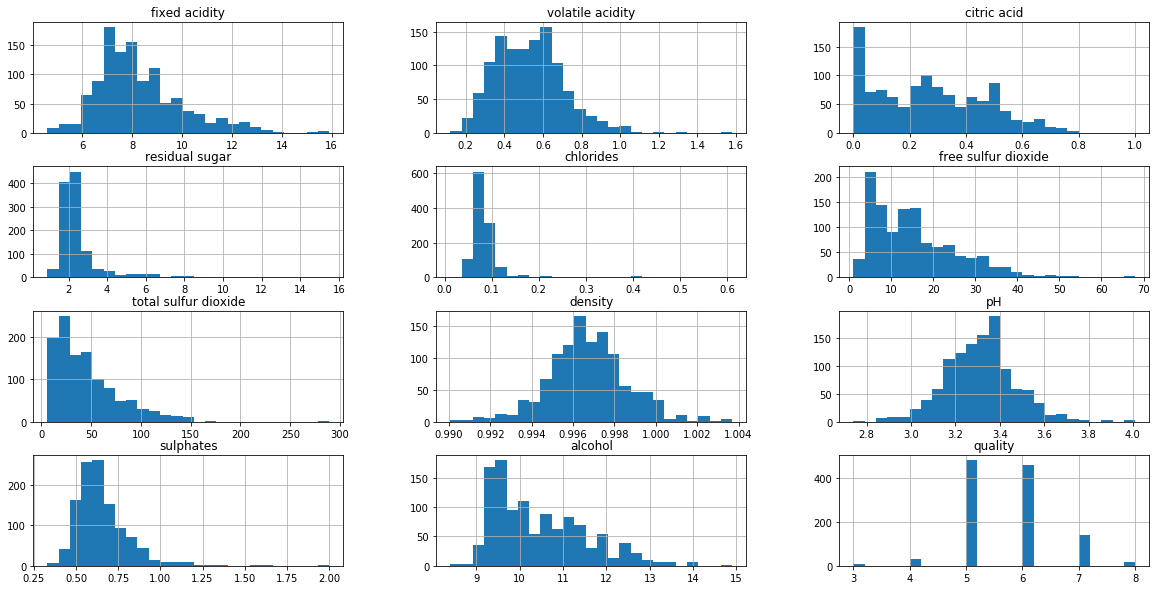

In [10]:
wine.hist(bins=25, figsize=(20, 10))
plt.show()

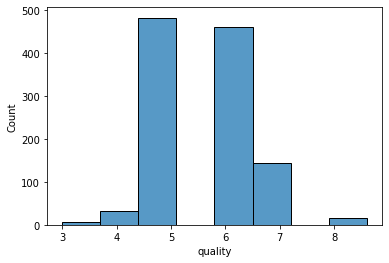

In [11]:
sns.histplot(data=wine, x='quality', binwidth=0.7)
plt.show()

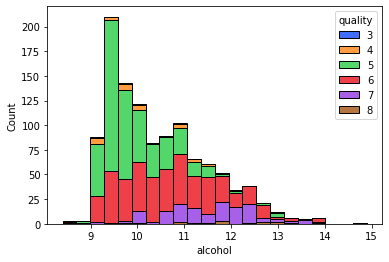

In [12]:
sns.histplot(data=wine, x='alcohol', hue='quality', multiple="stack", palette='bright')
plt.show()

In [13]:
wine_cols = wine.drop('quality', axis=1)

In [14]:
print(len(wine_cols.columns))

11


In [15]:
print(len(wine_cols))

1143


In [16]:
print(wine_cols.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


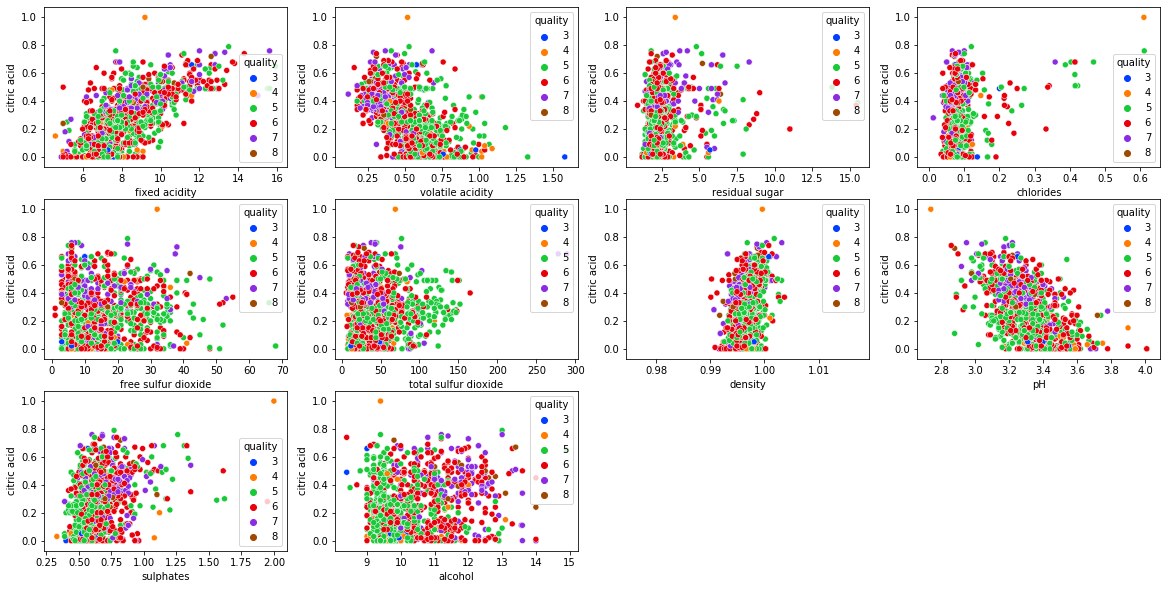

In [17]:
def scatter(column):
    plt.figure(figsize=(20, 10))
    wine_col_ms = wine_cols.columns.drop(column)
    for i in range(0, len(wine_col_ms)):
        plt.subplot(3, 4, i+1)
        sns.scatterplot(x=wine_col_ms[i], y=column, hue='quality', data=wine, palette='bright')
        
scatter('citric acid')

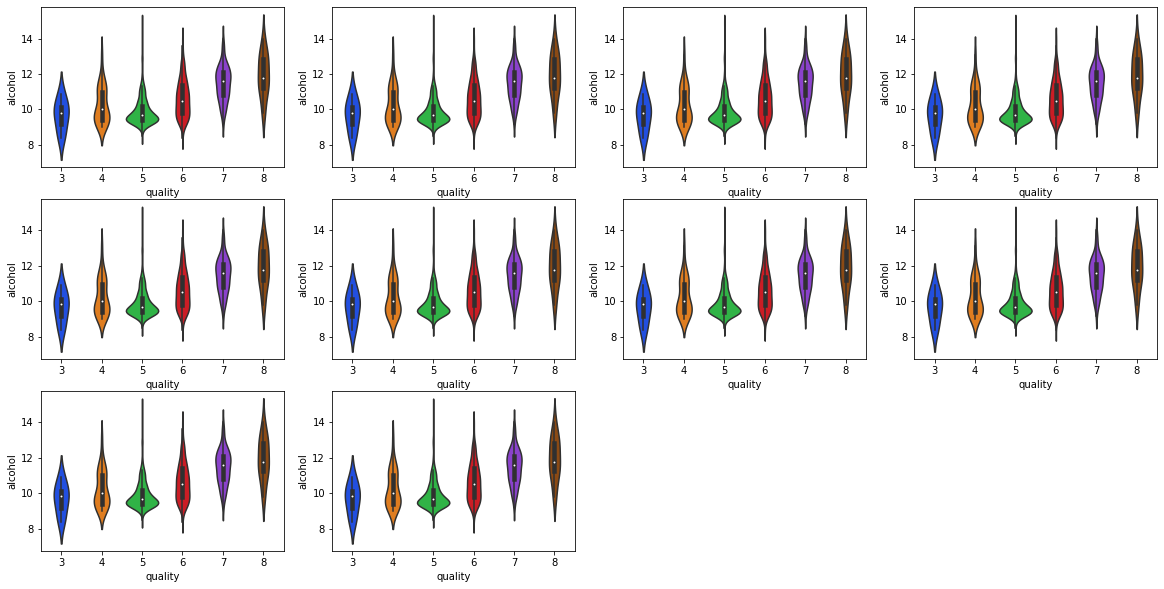

In [18]:
def violinplot(column):
    plt.figure(figsize=(20, 10))
    wine_cols_v = wine_cols.columns.drop(column)
    for i in range(0, len(wine_cols_v)):
        plt.subplot(3, 4, i+1)
        sns.violinplot(data=wine, x='quality', y=column, palette='bright')
violinplot('alcohol')

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
wine['high_quality'] = [1 if x >= 7 else 0 for x in wine.quality]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [21]:
print(wine.high_quality.value_counts())

0    984
1    159
Name: high_quality, dtype: int64


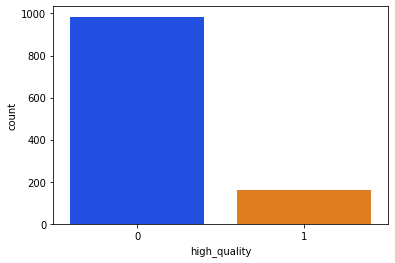

In [22]:
sns.countplot(x='high_quality', data=wine, palette='bright');

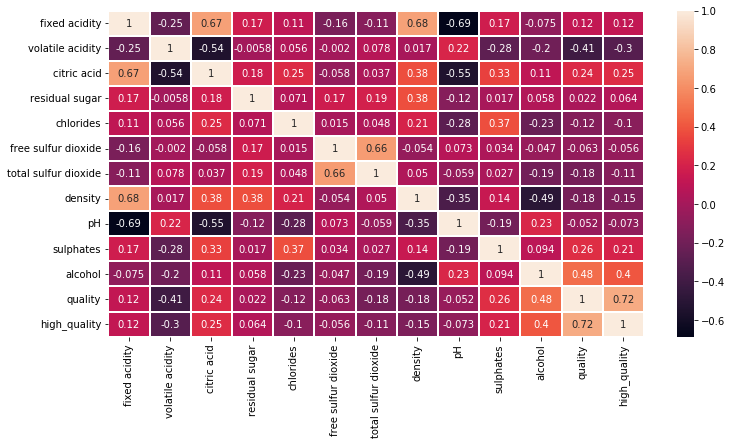

In [23]:
# Confusion Matrix
plt.figure(figsize=(12, 6))
ax = sns.heatmap(wine.corr(), annot=True, linewidths=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [24]:
X = wine.drop(['quality', 'high_quality'], axis=1)
y = wine['high_quality']

In [25]:
X = StandardScaler().fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
model_01 = KNeighborsClassifier(n_neighbors=11)
model_01.fit(X_train, y_train)
model_O1pred = model_01.predict(X_test)
print(classification_report(y_test, model_O1pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       200
           1       0.43      0.34      0.38        29

    accuracy                           0.86       229
   macro avg       0.67      0.64      0.65       229
weighted avg       0.85      0.86      0.85       229

